# Overview

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

# Data Dictionary
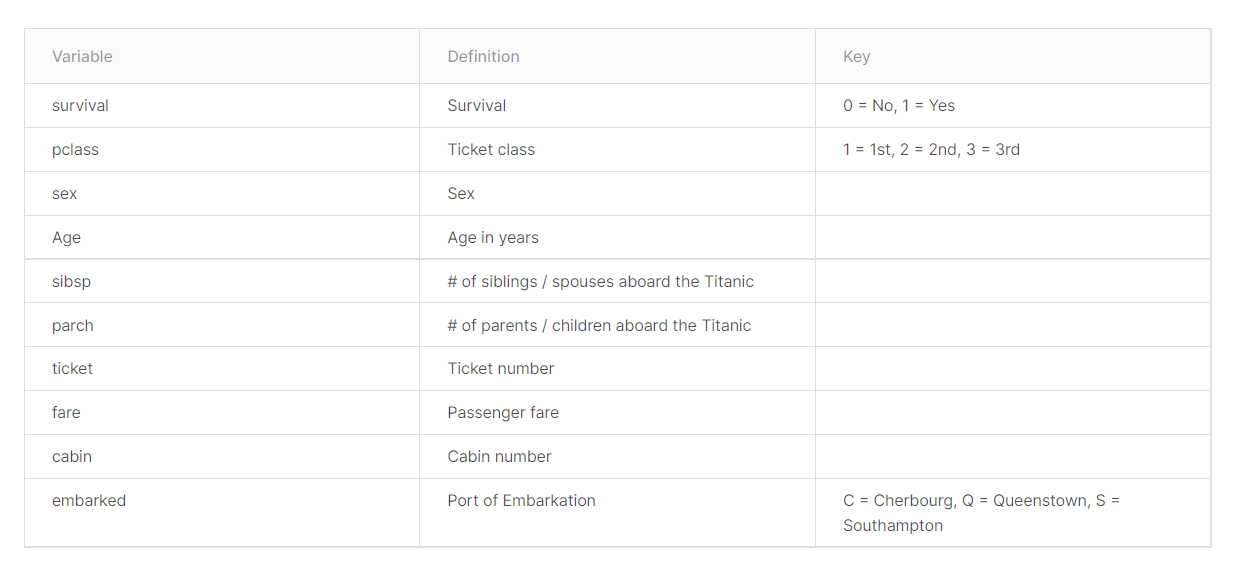


# Variable Notes
**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a **nanny**, therefore **parch=0** for them

In [64]:
# Import all needed libaries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve 

print("All Modules Initialized 🚀")

# Importing the data
URL = "https://raw.githubusercontent.com/muhammadanas0716/Data-Science-Projects---EDA/main/9.%20Titanic%20Surviors%20-%20Analysis/titanic.csv"
titanic_df = pd.read_csv(URL)

print("Data Imported Successfully 🚀")

All Modules Initialized 🚀
Data Imported Successfully 🚀


In [65]:
# Change the Column names
titanic_df = titanic_df.rename(columns = {
    'pclass':'ticket_class',
    'ticker' : 'ticker_number',
    'cabin' : 'cabin_number',
})

In [66]:
# Change the Exbarkment values to proper words
titanic_df["Embarked"].replace({
    "C": "Cherbourg", 
    "Q": "Queenstown", 
    "S" : "Southampton"
}, inplace=True)

In [67]:
# Remove PassengerId column as it's useless
titanic_df.drop("PassengerId", axis = 1, inplace = True) 

In [68]:
# See first 5 rows of data
titanic_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton


In [69]:
# See last 5 rows of data
titanic_df.tail(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Southampton
417,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,Cherbourg


Pairplot -  Pairplot is used to plot multiple pairwise bivariate distributions in a dataset.
syntax - sns.pairplot(data)

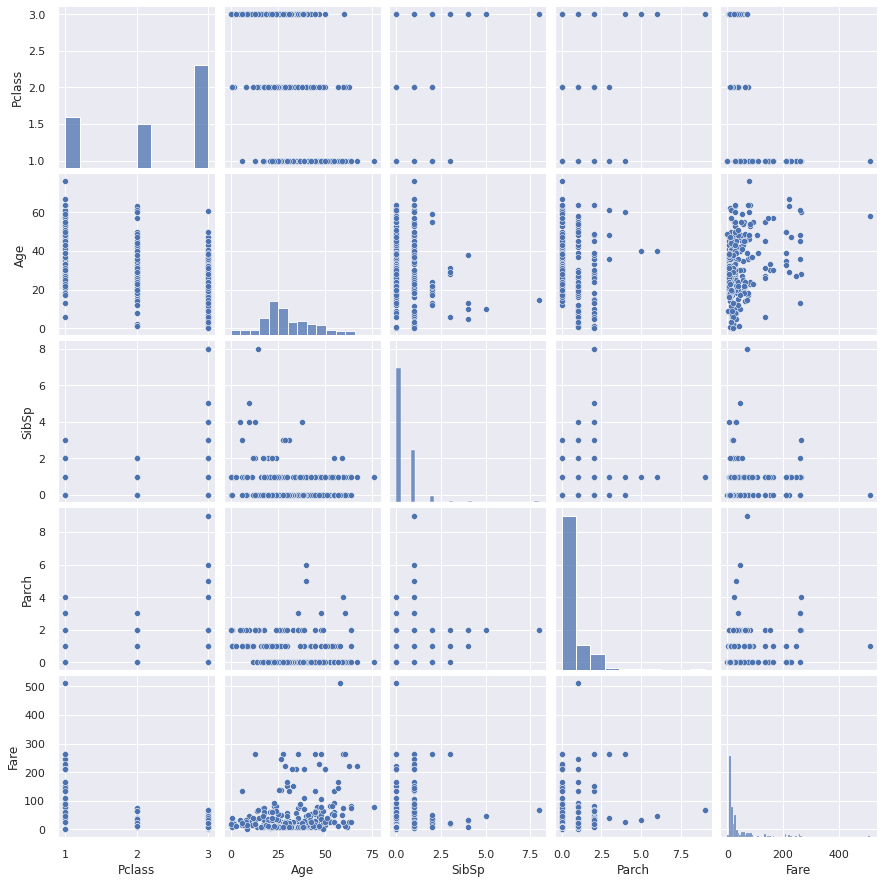

In [70]:
#pairplot
plt.style.use("seaborn-notebook")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(titanic_df)
plt.show()

Heatmap -  A heatmap is a graphical representation of data where values are depicted by color.
syntax - sns.heatmap(data)

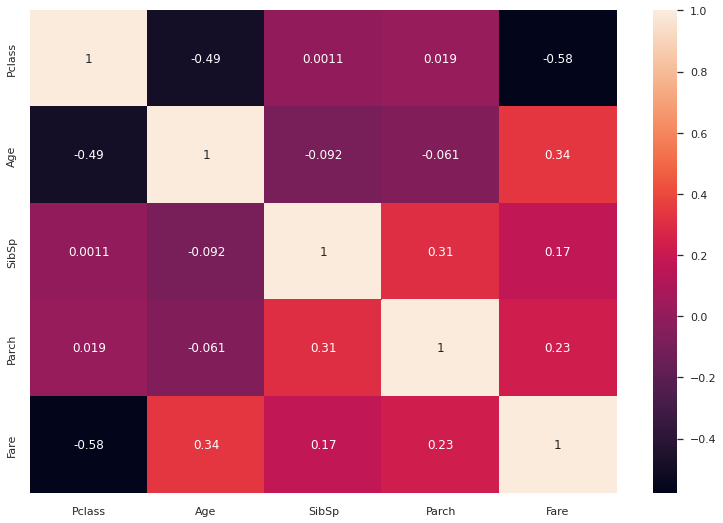

In [71]:
#heatmap
titanic_mx = titanic_df.corr()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(titanic_mx, annot=True, cmap='rocket')
plt.show()

Countplot - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.
syntax - sns.countplot(data)

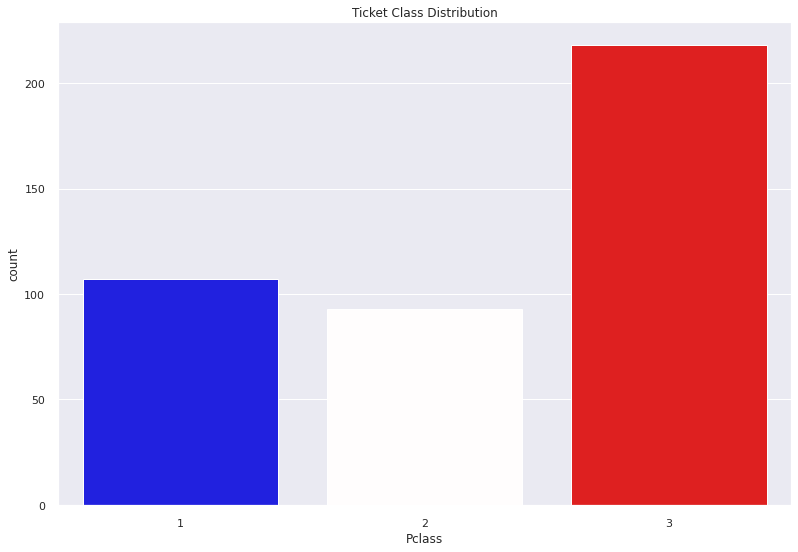

In [151]:
# countplot
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=titanic_df, x="Pclass", palette="seismic").set(
    title = "Ticket Class Distribution"
)
plt.show()

Histogram - A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.
syntax - sns.histplot(data)

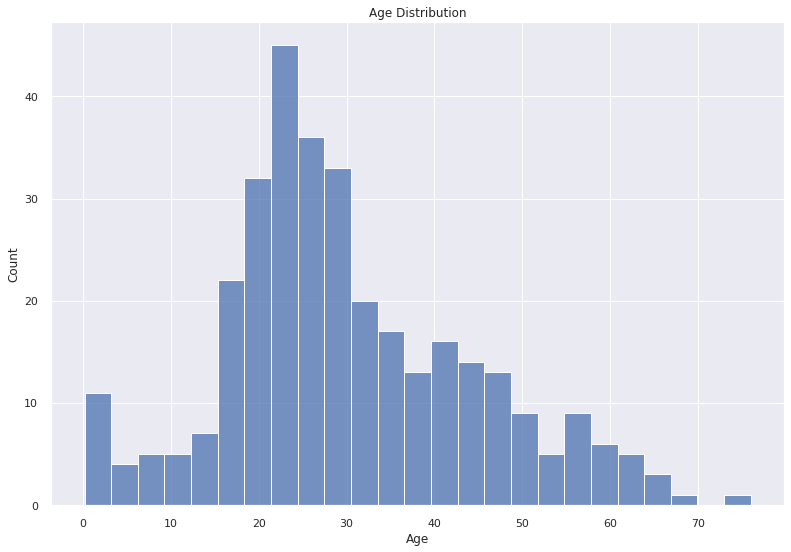

In [78]:
#histogram
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(titanic_df, x="Age", bins=25).set(
    title = "Age Distribution"
)
plt.show()

Violin Plot -A violin plot is a statistical representation of numerical data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.
syntax - sns.violinplot

 Stripplot - A stripplot is a type of scatter plot where one variable is categorical and the other variable is continuous.
 syntax = sns.stripplot(data) 

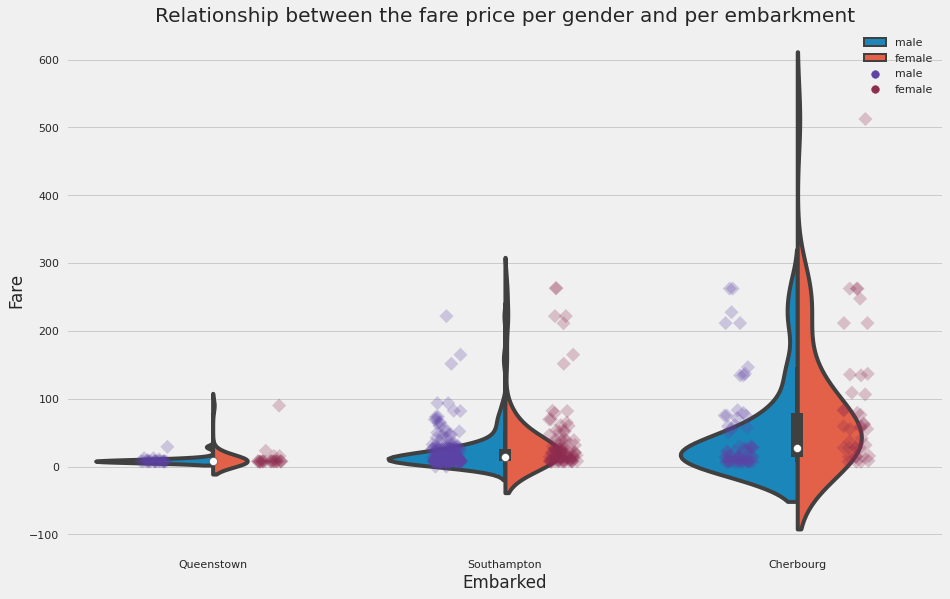

In [139]:
# Relationship between the fare price per gender and per embarkment
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,9))

sns.violinplot(x='Embarked',y='Fare',data=titanic_df, hue='Sex',split=True).set(
    title="Relationship between the fare price per gender and per embarkment",
    xlabel = "Embarkment", 
)
sns.stripplot(x='Embarked',y='Fare',data=titanic_df, jitter=True, 
              hue='Sex', dodge=True, palette="twilight",marker="D",size=10, edgecolor="gray", alpha=.25)

# Moves legend to the best position
plt.legend(loc=0)
plt.show()

In [152]:
titanic_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg,Dona
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Southampton,Mr


KDE Plot It is a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
syntax = sns.kdeplot(data) 

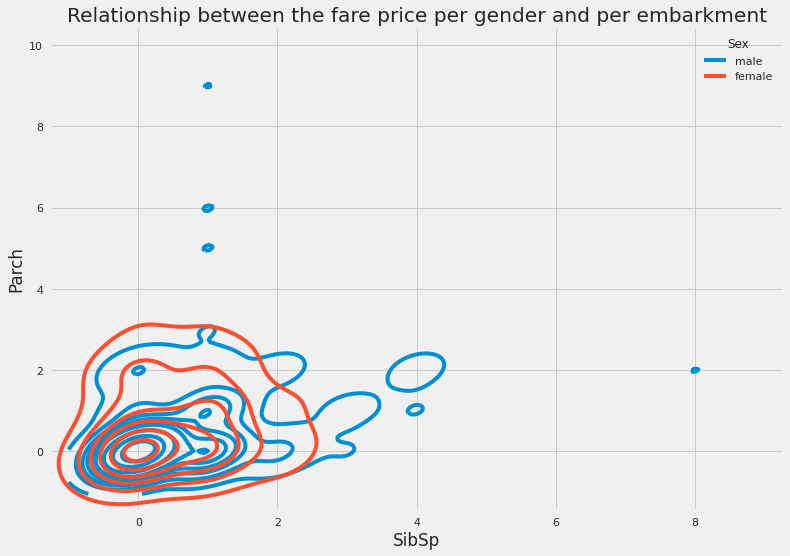

In [175]:
sns.kdeplot(x='SibSp', y='Parch', hue='Sex', data=titanic_df).set(
    title="Relationship between the fare price per gender and per embarkment",
)

plt.show()